In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
data=pd.read_csv(r"C:\Users\Makaa\Desktop\ML ZoomCamp\Customer Churn Prediction\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df=data.copy()
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.duplicated().value_counts()

False    7043
dtype: int64

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
categorical_columns = list(df.dtypes[df.dtypes=='object'].index)

for c in categorical_columns: 
    df[c] = df[c].str.lower().str.replace(' ','_')

In [9]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,0,yes,yes,24,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,1990.5,no
7039,2234-xaduh,female,0,yes,yes,72,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,7362.9,no
7040,4801-jzazl,female,0,yes,yes,11,no,no_phone_service,dsl,yes,...,no,no,no,no,month-to-month,yes,electronic_check,29.60,346.45,no
7041,8361-ltmkd,male,1,yes,no,4,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,74.40,306.6,yes


In [10]:
for col in df.columns: 
    print('unique values in ',col,' are : ')
    print(df[col].unique())

unique values in  customerID  are : 
['7590-vhveg' '5575-gnvde' '3668-qpybk' ... '4801-jzazl' '8361-ltmkd'
 '3186-ajiek']
unique values in  gender  are : 
['female' 'male']
unique values in  SeniorCitizen  are : 
[0 1]
unique values in  Partner  are : 
['yes' 'no']
unique values in  Dependents  are : 
['no' 'yes']
unique values in  tenure  are : 
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
unique values in  PhoneService  are : 
['no' 'yes']
unique values in  MultipleLines  are : 
['no_phone_service' 'no' 'yes']
unique values in  InternetService  are : 
['dsl' 'fiber_optic' 'no']
unique values in  OnlineSecurity  are : 
['no' 'yes' 'no_internet_service']
unique values in  OnlineBackup  are : 
['yes' 'no' 'no_internet_service']
unique values in  DeviceProtection  are : 
['no' 'yes' 'no_internet_service']
unique

In [11]:
#chang the type of TotalCharges
tc = pd.to_numeric(df.TotalCharges,errors = 'coerce')
tc

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [12]:
df[tc.isnull()]['TotalCharges']

488     _
753     _
936     _
1082    _
1340    _
3331    _
3826    _
4380    _
5218    _
6670    _
6754    _
Name: TotalCharges, dtype: object

In [13]:
df.TotalCharges = pd.to_numeric(df.TotalCharges,errors = 'coerce')

In [14]:
# fill null values with 0
df.TotalCharges = df.TotalCharges.fillna(0)

In [15]:
df[tc.isnull()]['TotalCharges']

488     0.0
753     0.0
936     0.0
1082    0.0
1340    0.0
3331    0.0
3826    0.0
4380    0.0
5218    0.0
6670    0.0
6754    0.0
Name: TotalCharges, dtype: float64

In [16]:
df.Churn.value_counts()

no     5174
yes    1869
Name: Churn, dtype: int64

In [17]:
df.Churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: Churn, dtype: object

In [18]:
#converting Churn column to int for Classification becouse we will use it as target in the model.
df.Churn = (df.Churn == 'yes').astype(int)
df.Churn.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [19]:
df.head().T

,0,1,2,3,4
customerID,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
SeniorCitizen,0,0,0,0,0
Partner,yes,no,no,no,no
Dependents,no,no,no,no,no
tenure,1,34,2,45,2
PhoneService,no,yes,yes,no,yes
MultipleLines,no_phone_service,no,no,no_phone_service,no
InternetService,dsl,dsl,dsl,dsl,fiber_optic
OnlineSecurity,no,yes,yes,yes,no


# Splitting The Dataset

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
random_state = 42

In [22]:
df_full, df_test = train_test_split(df,test_size = 0.2,random_state = random_state)

In [23]:
len(df)*.20,len(df_full)*.25


(1408.6000000000001, 1408.5)

In [24]:
df_train,df_val = train_test_split(df_full,test_size=0.25,random_state=random_state)


In [25]:
len(df),  len(df_train),  len(df_val),  len(df_test),    (len(df_train)+len(df_val)+len(df_test))

(7043, 4225, 1409, 1409, 7043)

In [26]:
df_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6157,6776-tlwoi,male,0,no,no,3,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,mailed_check,19.85,64.55,1
817,0036-ihmot,female,0,yes,yes,55,yes,no,fiber_optic,no,...,yes,yes,yes,yes,one_year,yes,bank_transfer_(automatic),103.70,5656.75,0
6977,2843-cqmeg,male,0,no,no,24,yes,no,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,49.70,1218.25,0
1932,3247-mhjkm,male,0,no,no,1,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,mailed_check,20.20,20.20,0
4168,1194-bhjyc,male,0,yes,no,61,no,no_phone_service,dsl,yes,...,yes,yes,yes,yes,two_year,yes,mailed_check,62.15,3778.85,0


In [27]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [28]:
df_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6776-tlwoi,male,0,no,no,3,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,mailed_check,19.85,64.55,1
1,0036-ihmot,female,0,yes,yes,55,yes,no,fiber_optic,no,...,yes,yes,yes,yes,one_year,yes,bank_transfer_(automatic),103.70,5656.75,0
2,2843-cqmeg,male,0,no,no,24,yes,no,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,49.70,1218.25,0
3,3247-mhjkm,male,0,no,no,1,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,mailed_check,20.20,20.20,0
4,1194-bhjyc,male,0,yes,no,61,no,no_phone_service,dsl,yes,...,yes,yes,yes,yes,two_year,yes,mailed_check,62.15,3778.85,0


In [29]:
y_train = df_train.Churn.values
y_val = df_val.Churn.values
y_test = df_test.Churn.values
y_train

array([1, 0, 0, ..., 0, 0, 0])

In [30]:
df_train.drop(columns='Churn',axis = 1, inplace=True)
df_val.drop(columns='Churn',axis = 1, inplace=True)
df_test.drop(columns='Churn',axis = 1, inplace=True)
df_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,6776-tlwoi,male,0,no,no,3,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,mailed_check,19.85,64.55
1,0036-ihmot,female,0,yes,yes,55,yes,no,fiber_optic,no,yes,yes,yes,yes,yes,one_year,yes,bank_transfer_(automatic),103.70,5656.75
2,2843-cqmeg,male,0,no,no,24,yes,no,dsl,no,yes,no,no,no,no,month-to-month,yes,mailed_check,49.70,1218.25
3,3247-mhjkm,male,0,no,no,1,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,mailed_check,20.20,20.20
4,1194-bhjyc,male,0,yes,no,61,no,no_phone_service,dsl,yes,no,yes,yes,yes,yes,two_year,yes,mailed_check,62.15,3778.85


# Importance & Ratios

Global Churn Ratio

Ratio of Churn with Another Feature

Risk of Churn


In [31]:
df_full.Churn.value_counts()

0    4138
1    1496
Name: Churn, dtype: int64

In [32]:
global_churn_ratio =df_full.Churn.mean()
print('Ratio Of Churn Customers :',global_churn_ratio)

Ratio Of Churn Customers : 0.2655307064252751


In [33]:
(df_full.gender=='male').astype(int).sum()

2887

In [34]:
ratio_churn_female = df_full[df_full.gender=='female'].Churn.mean()
print('The Ration of Churn From Female :', ratio_churn_female)

The Ration of Churn From Female : 0.2708409173643975


In [35]:
ratio_churn_male = df_full[df_full.gender=='male'].Churn.mean()
print('The Ration of Churn From male :', ratio_churn_male)

The Ration of Churn From male : 0.26047800484932454


In [36]:
df_full.Partner.value_counts()

no     2904
yes    2730
Name: Partner, dtype: int64

In [37]:
ratio_churn_partner = df_full[df_full.Partner=='yes'].Churn.mean()
print('The Ration of Churn For Who Has Partner :', ratio_churn_partner)

The Ration of Churn For Who Has Partner : 0.20073260073260074


In [38]:
ratio_churn_no_partner = df_full[df_full.Partner=='no'].Churn.mean()
print('The Ration of Churn For Who Has NO Partner :', ratio_churn_no_partner)

The Ration of Churn For Who Has NO Partner : 0.32644628099173556


In [39]:
print('The Risk Of Churn for who has Partener :',ratio_churn_partner/global_churn_ratio)

The Risk Of Churn for who has Partener : 0.7559675618499149


In [40]:
print('The Risk Of Churn for who has no Partener :',ratio_churn_no_partner/global_churn_ratio)

The Risk Of Churn for who has no Partener : 1.2294106598311754


In [41]:
print('The Risk Of Churn for females :',ratio_churn_female/global_churn_ratio)

The Risk Of Churn for females : 1.0199984815715346


In [42]:
print('The Risk Of Churn for males :',ratio_churn_male/global_churn_ratio)

The Risk Of Churn for males : 0.9809713097066141


In [43]:
categorical_columns = [ 'gender',  'SeniorCitizen','Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

In [44]:
from IPython.display import display

In [45]:
# display mean, count, risk, and difference for every caltegorical column

for c in categorical_columns:
    df_group=df_full.groupby(c).Churn.agg(["mean","count"])
    df_group['Risk'] = df_group['mean'] / global_churn_ratio
    df_group['difference'] = df_group['mean']-global_churn_ratio
    display(df_group)



,mean,count,Risk,difference
gender,,,,
female,0.270841,2747,1.019998,0.005310
male,0.260478,2887,0.980971,-0.005053


,mean,count,Risk,difference
SeniorCitizen,,,,
0,0.237098,4728,0.892922,-0.028433
1,0.413907,906,1.558793,0.148377


,mean,count,Risk,difference
Partner,,,,
no,0.326446,2904,1.229411,0.060916
yes,0.200733,2730,0.755968,-0.064798


,mean,count,Risk,difference
Dependents,,,,
no,0.312326,3951,1.176233,0.046795
yes,0.155674,1683,0.586276,-0.109856


,mean,count,Risk,difference
PhoneService,,,,
no,0.253623,552,0.955156,-0.011908
yes,0.266824,5082,1.004871,0.001293


,mean,count,Risk,difference
MultipleLines,,,,
no,0.251397,2685,0.946771,-0.014134
no_phone_service,0.253623,552,0.955156,-0.011908
yes,0.284105,2397,1.069952,0.018574


,mean,count,Risk,difference
InternetService,,,,
dsl,0.191851,1939,0.722521,-0.073679
fiber_optic,0.415558,2481,1.565010,0.150028
no,0.076606,1214,0.288502,-0.188924


,mean,count,Risk,difference
OnlineSecurity,,,,
no,0.416014,2810,1.566727,0.150484
no_internet_service,0.076606,1214,0.288502,-0.188924
yes,0.145342,1610,0.547363,-0.120189


,mean,count,Risk,difference
OnlineBackup,,,,
no,0.398693,2448,1.501494,0.133162
no_internet_service,0.076606,1214,0.288502,-0.188924
yes,0.216531,1972,0.815467,-0.048999


,mean,count,Risk,difference
DeviceProtection,,,,
no,0.387706,2489,1.460117,0.122175
no_internet_service,0.076606,1214,0.288502,-0.188924
yes,0.226825,1931,0.854234,-0.038705


,mean,count,Risk,difference
TechSupport,,,,
no,0.413472,2791,1.557153,0.147941
no_internet_service,0.076606,1214,0.288502,-0.188924
yes,0.152855,1629,0.575657,-0.112676


,mean,count,Risk,difference
StreamingTV,,,,
no,0.335418,2239,1.263197,0.069887
no_internet_service,0.076606,1214,0.288502,-0.188924
yes,0.298945,2181,1.125841,0.033415


,mean,count,Risk,difference
StreamingMovies,,,,
no,0.333333,2223,1.255348,0.067803
no_internet_service,0.076606,1214,0.288502,-0.188924
yes,0.301320,2197,1.134784,0.035789


,mean,count,Risk,difference
Contract,,,,
month-to-month,0.426533,3083,1.606340,0.161002
one_year,0.117987,1212,0.444343,-0.147544
two_year,0.028379,1339,0.106878,-0.237151


,mean,count,Risk,difference
PaperlessBilling,,,,
no,0.16414,2309,0.618159,-0.101390
yes,0.33594,3325,1.265164,0.070409


,mean,count,Risk,difference
PaymentMethod,,,,
bank_transfer_(automatic),0.174475,1238,0.657080,-0.091056
credit_card_(automatic),0.152404,1227,0.573961,-0.113126
electronic_check,0.449921,1887,1.694420,0.184390
mailed_check,0.190328,1282,0.716782,-0.075203


# Feature Importance : Mutual Information 

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency. 

In [46]:
from sklearn.metrics import mutual_info_score

In [47]:
mutual_info_score(df_full.Churn,df_full.gender)


6.877785208564413e-05

In [48]:
def mutual_info_churn_score(series):
    return mutual_info_score(series,df_full.Churn)


In [49]:
#apply a y function to the series of the df dataframe
mutual_information = df_full[categorical_columns].apply(mutual_info_churn_score)
mutual_information.sort_values(ascending=False).to_frame(name='mutual_information')

,mutual_information
Contract,0.096652
OnlineSecurity,0.063393
TechSupport,0.060935
InternetService,0.053313
OnlineBackup,0.045424
PaymentMethod,0.042861
DeviceProtection,0.042007
StreamingTV,0.030844
StreamingMovies,0.030705
PaperlessBilling,0.019077


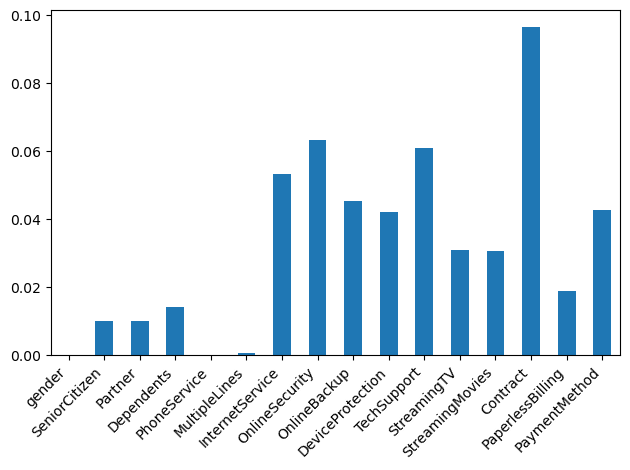

In [50]:
mutual_information.plot(kind='bar')
plt.rcParams["figure.figsize"] = (16, 5)
plt.xticks(rotation=45, ha="right")  # Rotate the x-axis labels to avoid overlap
plt.tight_layout()  # Adjust the layout to ensure everything fits
plt.show()


# Features Importants : Correlation

Correlation coefficient measures the degree of dependency between two variables. This value is negative if one variable grows while the other decreases, and it is positive if both variables increase. Depending on its size, the dependency between both variables could be low, moderate, or strong. It allows measuring the importance of numerical variables.

If r is correlation coefficient, then the correlation between two variables is:

LOW when r is between [0, -0.2) or [0, 0.2)

MEDIUM when r is between [-0.2, -0.5) or [2, 0.5)

STRONG when r is between [-0.5, -1.0] or [0.5, 1.0]

Positive Correlation vs. Negative Correlation 

When r is positive, an increase in x will increase y.
When r is negative, an increase in x will decrease y.
When r is 0, a change in x does not affect y.
Functions and methods:

df[x].corrwith(y) - returns the correlation between x and y series. This is a function from pandas.
Or you can use it column by column by df[c1].corr(df[c2])

In [51]:
df_full.tenure.min()

0

In [52]:
df_full.tenure.max()

72

the following for show the relation between two columns up or down or stable with increasement one of them 

In [53]:
df_full[df_full['tenure']>-1].Churn.mean()

0.2655307064252751

In [54]:
df_full[df_full['tenure']<5].Churn.mean()

0.5495867768595041

In [55]:
df_full[df_full['tenure']>=5].Churn.mean()

0.20660094299185597

In [56]:
df_full[df_full['tenure']<2].Churn.mean()

0.6090534979423868

In [57]:
df_full[df_full['tenure']>30].Churn.mean()

0.1353135313531353

With more Tenure the risk of Churn decrease 

In [58]:
df_full[df_full['MonthlyCharges']>18].Churn.mean()

0.2655307064252751

In [59]:
df_full[df_full['MonthlyCharges']>60].Churn.mean()

0.33252574197456086

In [60]:
df_full[df_full['MonthlyCharges']>100].Churn.mean()

0.29362880886426596

In [61]:
df_full[ (df_full['tenure']>=5) & (df_full['MonthlyCharges']>100)].Churn.mean()

0.2838983050847458

In [62]:
df_full['tenure'].corr(df_full.Churn)

-0.34492502696211386

In [63]:
numerical_columns=['MonthlyCharges','TotalCharges','tenure']

In [64]:
df_full[numerical_columns].corrwith(df_full.Churn)

MonthlyCharges    0.188574
TotalCharges     -0.193370
tenure           -0.344925
dtype: float64

In [65]:
#the abs for the correlation value without the direction 
df_full[numerical_columns].corrwith(df_full.Churn).abs()

MonthlyCharges    0.188574
TotalCharges      0.193370
tenure            0.344925
dtype: float64

Tenure have most correlation with Churn but in Inverse relationship 

# Mutual Information vs. Correlation


Both mutual information and correlation are used to measure the relationship between two variables, but they differ in their underlying principles and scope.   

Correlation
Measures Linear Relationships: Correlation primarily focuses on linear relationships between variables. It calculates a coefficient that ranges from -1 to 1, where -1 indicates a perfect negative correlation, 1 indicates a perfect positive correlation, and 0 indicates no correlation.   
Sensitive to Outliers: Correlation can be sensitive to outliers, as they can significantly influence the calculated coefficient.   
Limited to Numeric Data: Correlation is typically used for numeric data.
Mutual Information
Measures Any Type of Relationship: Mutual information measures the dependence between two random variables, regardless of whether the relationship is linear or nonlinear. It quantifies the amount of information that knowing one variable provides about the other.   
Robust to Outliers: Mutual information is generally less sensitive to outliers than correlation.
Can Handle Categorical and Numeric Data: It can be used for both categorical and numeric data.


# One-Hot Encoding 

In [66]:
from sklearn.feature_extraction import DictVectorizer

Explain How DictVectorizer work 

from Dictionery to verctor 

#  fit:

Purpose: Learns the vocabulary (unique terms) present in the input data.
Input: A list or array of dictionaries.
Output: A DictVectorizer object that stores the learned vocabulary.
Functionality: Creates a mapping between the unique terms and their corresponding feature indices.


# transform:

Purpose: Transforms new input data using the vocabulary learned from a previously fitted DictVectorizer.
Input: A list or array of dictionaries.
Output: A sparse matrix representation of the input data, using the same feature indices as the original training data.
Functionality: Converts the new input data into the sparse matrix format using the existing vocabulary mapping.


# fit_transform:

Purpose: Combines the fit and transform steps into a single operation.
Input: A list or array of dictionaries.
Output: A sparse matrix representation of the input data, where each row corresponds to a document and each column represents a feature (term).
Functionality: First, learns the vocabulary using fit. Then, transforms the input data into the sparse matrix format using the learned vocabulary.



# Why use transform on the validation dataset:

Consistency: The validation dataset should be processed using the same vocabulary and feature indices as the training dataset to ensure fair comparison and evaluation.
Avoid Data Leakage: Using fit_transform on the validation dataset would introduce information from the validation data into the model training process, leading to data leakage and overfitting.
Correct Feature Representation: transform guarantees that the features extracted from the validation data are aligned with the features learned from the training data, preventing inconsistencies in the evaluation process.


 In summary:

fit is used to learn the vocabulary from the training data.
fit_transform is used to learn the vocabulary and transform the training data in one step.
transform is used to transform new data (like the validation dataset) using the previously learned vocabulary.
By using transform on the validation dataset, you ensure that the model is evaluated on data that is processed consistently with the training data, preventing data leakage and improving the reliability of the evaluation results.

In [67]:
df_full[['gender','PhoneService','tenure']].head()

,gender,PhoneService,tenure
2142,female,yes,21
1623,female,yes,54
6074,male,no,1
1362,male,yes,4
6754,male,yes,0


In [68]:
gp=df_full[['gender','PhoneService','tenure']].head().to_dict(orient='records')


In [69]:
dv=DictVectorizer(sparse=False)

In [70]:
dv.fit(gp)


DictVectorizer(sparse=False)

In [71]:
dv.feature_names_

['PhoneService=no',
 'PhoneService=yes',
 'gender=female',
 'gender=male',
 'tenure']

In [72]:
dv.transform(gp)

array([[ 0.,  1.,  1.,  0., 21.],
       [ 0.,  1.,  1.,  0., 54.],
       [ 1.,  0.,  0.,  1.,  1.],
       [ 0.,  1.,  0.,  1.,  4.],
       [ 0.,  1.,  0.,  1.,  0.]])

DictVectorizer for train & val dataset

In [73]:
df_train[categorical_columns + numerical_columns].head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure
0,male,0,no,no,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,mailed_check,19.85,64.55,3
1,female,0,yes,yes,yes,no,fiber_optic,no,yes,yes,yes,yes,yes,one_year,yes,bank_transfer_(automatic),103.70,5656.75,55
2,male,0,no,no,yes,no,dsl,no,yes,no,no,no,no,month-to-month,yes,mailed_check,49.70,1218.25,24
3,male,0,no,no,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,mailed_check,20.20,20.20,1
4,male,0,yes,no,no,no_phone_service,dsl,yes,no,yes,yes,yes,yes,two_year,yes,mailed_check,62.15,3778.85,61


In [74]:
dict_train_df=df_train[categorical_columns + numerical_columns].to_dict(orient='records')
dict_train_df[0]

{'gender': 'male',
 'SeniorCitizen': 0,
 'Partner': 'no',
 'Dependents': 'no',
 'PhoneService': 'yes',
 'MultipleLines': 'no',
 'InternetService': 'no',
 'OnlineSecurity': 'no_internet_service',
 'OnlineBackup': 'no_internet_service',
 'DeviceProtection': 'no_internet_service',
 'TechSupport': 'no_internet_service',
 'StreamingTV': 'no_internet_service',
 'StreamingMovies': 'no_internet_service',
 'Contract': 'month-to-month',
 'PaperlessBilling': 'no',
 'PaymentMethod': 'mailed_check',
 'MonthlyCharges': 19.85,
 'TotalCharges': 64.55,
 'tenure': 3}

In [75]:
X_train = dv.fit_transform(dict_train_df)
X_train[0]

array([ 1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,
        0.  ,  1.  , 19.85,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
        0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,
        1.  ,  0.  ,  0.  ,  1.  ,  0.  , 64.55,  0.  ,  1.  ,  3.  ])

In [76]:
#fit OHE for val dataset
dict_val_df=df_val[categorical_columns + numerical_columns].to_dict(orient='records')
dict_val_df[0]

{'gender': 'male',
 'SeniorCitizen': 0,
 'Partner': 'no',
 'Dependents': 'no',
 'PhoneService': 'no',
 'MultipleLines': 'no_phone_service',
 'InternetService': 'dsl',
 'OnlineSecurity': 'no',
 'OnlineBackup': 'no',
 'DeviceProtection': 'no',
 'TechSupport': 'yes',
 'StreamingTV': 'yes',
 'StreamingMovies': 'yes',
 'Contract': 'month-to-month',
 'PaperlessBilling': 'yes',
 'PaymentMethod': 'electronic_check',
 'MonthlyCharges': 51.7,
 'TotalCharges': 3005.8,
 'tenure': 59}

In [77]:
X_val = dv.transform(dict_val_df)
X_val[0]

array([1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 5.1700e+01, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 3.0058e+03, 0.0000e+00, 1.0000e+00, 5.9000e+01])

# Training Logistic Regression with  Scikit-Learn

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
model = LogisticRegression(solver='liblinear', random_state=random_state)


In [80]:
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [81]:
model.predict_proba(X_val)

array([[0.83279336, 0.16720664],
       [0.74686315, 0.25313685],
       [0.56434202, 0.43565798],
       ...,
       [0.28653238, 0.71346762],
       [0.94944523, 0.05055477],
       [0.96397553, 0.03602447]])

In [82]:
y_val_pred=model.predict_proba(X_val)[:,1]  #all predictions second column (Churn)
y_val_pred

array([0.16720664, 0.25313685, 0.43565798, ..., 0.71346762, 0.05055477,
       0.03602447])

In [83]:
churn_y_val_pred = y_val_pred >= 0.5
churn_y_val_pred

array([False, False, False, ...,  True, False, False])

In [84]:
# hard val prediction 
model.predict(X_val)

array([0, 0, 0, ..., 1, 0, 0])

In [85]:
y_val

array([0, 0, 1, ..., 1, 0, 0])

In [86]:
true_counts =churn_y_val_pred == y_val
true_counts

array([ True,  True, False, ...,  True,  True,  True])

In [87]:
print ('Validation Accuracy : ', true_counts.mean())   #Mean calculates the (sum of ones / n )=> Accuracy

Validation Accuracy :  0.8034066713981547


# Model interpretation & Explation

In [88]:
model.intercept_

array([-0.14501866])

In [89]:
model.coef_.round(3)

array([[ 0.63 , -0.16 , -0.615, -0.054, -0.091,  0.027, -0.132, -0.04 ,
        -0.327,  0.314, -0.132,  0.003, -0.225,  0.124, -0.044,  0.076,
        -0.132, -0.089,  0.205, -0.132, -0.217, -0.241,  0.096, -0.076,
        -0.069, -0.107, -0.186,  0.211, -0.064,  0.124, -0.269,  0.163,
        -0.139, -0.132,  0.126, -0.059, -0.132,  0.046,  0.16 , -0.132,
        -0.173,  0.   ,  0.015, -0.16 , -0.055]])

In [90]:
dict(zip(dv.get_feature_names(),model.coef_[0].round(3))) #  intercept + w1*x1 + w2*x2

{'Contract=month-to-month': 0.63,
 'Contract=one_year': -0.16,
 'Contract=two_year': -0.615,
 'Dependents=no': -0.054,
 'Dependents=yes': -0.091,
 'DeviceProtection=no': 0.027,
 'DeviceProtection=no_internet_service': -0.132,
 'DeviceProtection=yes': -0.04,
 'InternetService=dsl': -0.327,
 'InternetService=fiber_optic': 0.314,
 'InternetService=no': -0.132,
 'MonthlyCharges': 0.003,
 'MultipleLines=no': -0.225,
 'MultipleLines=no_phone_service': 0.124,
 'MultipleLines=yes': -0.044,
 'OnlineBackup=no': 0.076,
 'OnlineBackup=no_internet_service': -0.132,
 'OnlineBackup=yes': -0.089,
 'OnlineSecurity=no': 0.205,
 'OnlineSecurity=no_internet_service': -0.132,
 'OnlineSecurity=yes': -0.217,
 'PaperlessBilling=no': -0.241,
 'PaperlessBilling=yes': 0.096,
 'Partner=no': -0.076,
 'Partner=yes': -0.069,
 'PaymentMethod=bank_transfer_(automatic)': -0.107,
 'PaymentMethod=credit_card_(automatic)': -0.186,
 'PaymentMethod=electronic_check': 0.211,
 'PaymentMethod=mailed_check': -0.064,
 'PhoneServ

In [91]:
sample = ['Contract', 'tenure', 'TotalCharges']
train_dict_small = df_train[sample].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)
# convert to one-hot Encoding 
X_small_train = dv_small.transform(train_dict_small)

dv_small.get_feature_names()

['Contract=month-to-month',
 'Contract=one_year',
 'Contract=two_year',
 'TotalCharges',
 'tenure']

In [92]:
model_small = LogisticRegression(solver='liblinear', random_state=random_state)
model_small.fit(X_small_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [93]:
model_small.intercept_[0]

-0.7087605584960186

In [94]:
dict(zip(dv_small.get_feature_names(), model_small.coef_[0].round(3)))


{'Contract=month-to-month': 0.928,
 'Contract=one_year': -0.241,
 'Contract=two_year': -1.396,
 'TotalCharges': 0.001,
 'tenure': -0.09}

In [95]:
val_dict_small = df_val[sample].to_dict(orient='records')
X_small_val = dv_small.transform(val_dict_small)

In [96]:
y_pred_small = model_small.predict_proba(X_small_val)[:, 1]
y_pred_small

array([0.0587024 , 0.31312983, 0.52875624, ..., 0.54585144, 0.04792555,
       0.02318653])

# Testing The Model 

In [97]:
print ('Validation Accuracy : ', true_counts.mean()) 

Validation Accuracy :  0.8034066713981547


In [98]:
dict_test_df=df_test[categorical_columns + numerical_columns].to_dict(orient='records')
X_test = dv.transform(dict_test_df)
X_test[0]

array([ 1. ,  0. ,  0. ,  1. ,  0. ,  1. ,  0. ,  0. ,  1. ,  0. ,  0. ,
       24.8,  0. ,  1. ,  0. ,  1. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,
        1. ,  0. ,  1. ,  0. ,  0. ,  1. ,  0. ,  1. ,  0. ,  0. ,  1. ,
        0. ,  0. ,  1. ,  0. ,  0. ,  1. ,  0. ,  0. , 24.8,  1. ,  0. ,
        1. ])

In [99]:
y_test_pred=model.predict_proba(X_test)[:,1]  #all predictions second column (Churn)
y_test_pred

array([0.7089075 , 0.04811733, 0.00565973, ..., 0.03955792, 0.01903704,
       0.56191605])

In [100]:
churn_y_test_pred = y_test_pred >=0.5
correct_y_test_pred = churn_y_test_pred == y_test
print('Accuracy : ',correct_y_test_pred.mean())

Accuracy :  0.8161816891412349


the predictions of validation and test were similar, which means that the model is working well.

# Using The Model

In [101]:
customer = dict_test_df[10]
customer

{'gender': 'male',
 'SeniorCitizen': 0,
 'Partner': 'no',
 'Dependents': 'no',
 'PhoneService': 'yes',
 'MultipleLines': 'no',
 'InternetService': 'no',
 'OnlineSecurity': 'no_internet_service',
 'OnlineBackup': 'no_internet_service',
 'DeviceProtection': 'no_internet_service',
 'TechSupport': 'no_internet_service',
 'StreamingTV': 'no_internet_service',
 'StreamingMovies': 'no_internet_service',
 'Contract': 'month-to-month',
 'PaperlessBilling': 'no',
 'PaymentMethod': 'mailed_check',
 'MonthlyCharges': 20.45,
 'TotalCharges': 20.45,
 'tenure': 1}

In [102]:
customer_ohe = dv.transform([customer])
customer_ohe


array([[ 1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,
         0.  ,  1.  , 20.45,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,
         1.  ,  0.  ,  0.  ,  1.  ,  0.  , 20.45,  0.  ,  1.  ,  1.  ]])

In [103]:
model.predict_proba(customer_ohe)[0,1]  # first array second column => churn proba

0.17847177925544722

In [104]:
y_test[10]

0

In [105]:
# For Another Customer 
def pred_customer(customer_number):
    customer = dict_test_df[customer_number]
    customer_ohe = dv.transform([customer])
    proba = model.predict_proba(customer_ohe)[0,1]
    print('Churn Probability. is : ',proba)
    print('Actual Churn Output is : ',y_test[customer_number])


In [106]:
pred_customer(10)

Churn Probability. is :  0.17847177925544722
Actual Churn Output is :  0


In [107]:
pred_customer(5)     #False prediction 

Churn Probability. is :  0.2639536061802576
Actual Churn Output is :  1


In [108]:
pred_customer(-1)

Churn Probability. is :  0.5619160514969783
Actual Churn Output is :  1


# Done...